# Example 7.1.1-7.4.2 Vending Machines

Author: Marcel Steiner-Curtis \
Date: 
05.04.2019 sml, 
05.03.2021 sml: Python-Jupyter Notebook, 
03.10.2021 sml: minimal version

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import scipy as scp

## Example 7.1.1 Vending Machines

read data

In [5]:
os.chdir('../04 Datasets')
data = pd.read_csv('vending-machines.dat', sep='\t')
data.head()

,Time,Volume,Distance,Town
0,16.68,7,560,San Diego
1,11.50,3,220,San Diego
2,12.03,3,340,San Diego
3,14.88,4,80,San Diego
4,13.75,6,150,San Diego


Scatter diagram: Time versus Volume

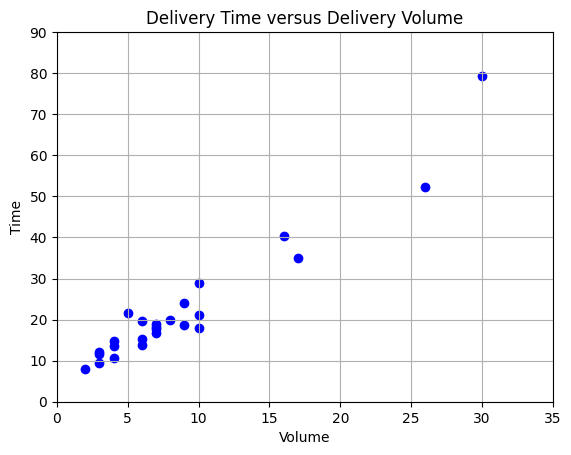

In [6]:
plt.close()
plt.xlim([0,35])
plt.ylim([0,90])
plt.scatter(data.Volume, data.Time, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Delivery Time versus Delivery Volume')
plt.xlabel('Volume')
plt.ylabel('Time')
plt.show()

REMARK: The diagram clearly indicates that there is a relationship between the delivery time and the delivery volume.
The data points are not exactly on a straight line, but they scatter very close to one.

## Example 7.2.1 Parameter Estimation & 7.3.1+2 Testing Hypothesis

### estimation of the parameters <span style="color:red">(smf.ols)</span>

In [14]:
mod = smf.ols(formula='Time ~ Volume', data=data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           8.22e-15
Time:                        10:16:26   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3208      1.371      2.422      0.0

residual standard error

In [8]:
sigmaHat = np.sqrt(mod.scale);   sigmaHat

4.181396703331078

scatter diagram: Time versus Volume

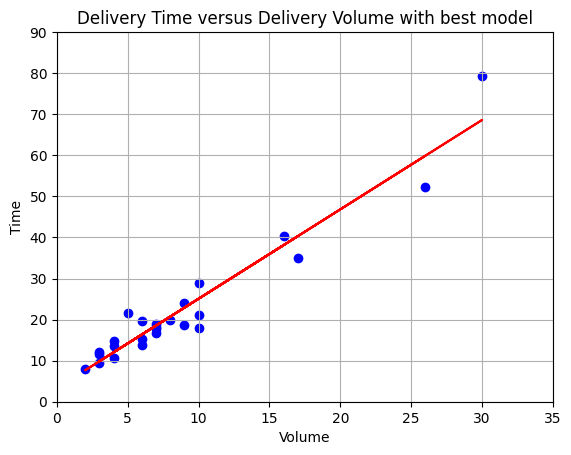

In [9]:
plt.close()
plt.xlim([0,35])
plt.ylim([0,90])
plt.scatter(data.Volume, data.Time, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Delivery Time versus Delivery Volume with best model')
plt.xlabel('Volume')
plt.ylabel('Time')
#   add best model
plt.plot(data.Volume, mod.predict(), color='red')
plt.show()

##  Example 7.3.3 Confidence Interval

95% confidence interval on the slope <span style="color:red">(smf.ols)</span>

In [10]:
mod.conf_int(alpha=0.05)

,0,1
Intercept,0.484498,6.157062
Volume,1.919592,2.432741


REMARK: The confidence interval of the slope contains $\beta_1=2$ and therefore a slope of 2 is very well compatible with the data.

## Example 7.4.1 Confidence Intervals on the Response & 7.4.2 Prediction Intervals

define a new `DataFrame` of equally spaced $x$-values covering at least the range of Volume-data

In [11]:
dataNew = pd.DataFrame({'Volume': np.linspace(-10, 40, num=101)})

predict

In [12]:
Pred = mod.get_prediction(dataNew).summary_frame(alpha=0.05)
Pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-18.440887,2.472516,-23.555676,-13.326098,-28.489840,-8.391934
1,-17.352804,2.414247,-22.347055,-12.358552,-27.340943,-7.364664
2,-16.264720,2.356170,-21.138829,-11.390612,-26.193332,-6.336109
3,-15.176637,2.298298,-19.931029,-10.422245,-25.047029,-5.306245
4,-14.088554,2.240648,-18.723687,-9.453420,-23.902057,-4.275050


scatter diagram: Time versus Volume with confidence intervals on the response and prediction interval

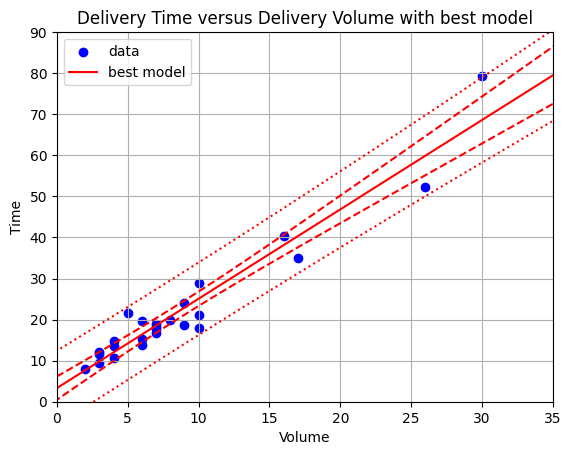

In [13]:
plt.close()
plt.xlim([0,35])
plt.ylim([0,90])
plt.scatter(data.Volume, data.Time, color='blue', label='data')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Delivery Time versus Delivery Volume with best model')
plt.xlabel('Volume')
plt.ylabel('Time')
#   add best model
plt.plot(dataNew.Volume, mod.predict(dataNew), color='red', label='best model')
#   add confidence intervals on the response
plt.plot(dataNew.Volume, Pred.mean_ci_lower, color='red', linestyle='--')
plt.plot(dataNew.Volume, Pred.mean_ci_upper, color='red', linestyle='--')
#   add prediction intervals
plt.plot(dataNew.Volume, Pred.obs_ci_lower, color='red', linestyle=':')
plt.plot(dataNew.Volume, Pred.obs_ci_upper, color='red', linestyle=':')
plt.legend(loc='best')
plt.show()